In [338]:
import pandas as pd
import numpy as np

In [339]:
# importing NLP packages:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [340]:
# reading the file
df = pd.read_csv("/content/data.csv", encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [341]:
df.isnull().sum()   # checking for null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [342]:
df = df.dropna(subset=['Description'])  # dropping null values in Description column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [343]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

# DATA CLEANING (COMPRESSING the Textual data)

### Replacing punctuation (.!<>{}’,”(/)-) and Numbers:

In [344]:
df['Description_NLP'] = df['Description'].str.replace("[^a-zA-Z]", " ")   # ^ means not symbol
df['Description_NLP']

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: Description_NLP, Length: 540455, dtype: object

### Dropping Short Words:

In [345]:
df['Description_NLP'] = df['Description_NLP'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['Description_NLP']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Description_NLP, Length: 540455, dtype: object

### converting words into LowerCase:

In [346]:
df['Description_NLP'] = [review.lower() for review in df['Description_NLP']]
df['Description_NLP']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Description_NLP, Length: 540455, dtype: object

### Remove Stop Words:

In [347]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')   # for english language

# Making custom list of words to be removed 
add_words = ['felt','spot','colour']
# Adding to the list of words
stop_words.extend(add_words)

# Defining a Function to remove stop words 
# take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['Description_NLP'] = [remove_stopwords(r) for r in df['Description_NLP']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Word tokenise + POS Tagging + Lemmatization:

In [348]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger') # Run atleast once 


lemmatizer = WordNetLemmatizer() # initialze Lemmatizer

# function to convert nltk tag to wordnet tag
# function for Converting the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
# word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
def lemmatize_sentence(sentence):
    
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    # tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:                
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))     
    return " ".join(lemmatized_sentence)


df['Description_NLP'] = df['Description_NLP'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [349]:
df['Description_NLP']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Description_NLP, Length: 540455, dtype: object

### Dropping the Duplicates:

In [350]:
df2 = df['Description_NLP'].drop_duplicates()
df2 = pd.DataFrame(df2)
df2

,Description_NLP
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


***INTERPRETATION*** of the above:


*   5,40,421 rows got reduced to 4,020 rows after dropping the duplicates
*   That means there are only 4,020 ***unique products*** are there



### Plotting most Frequent words:

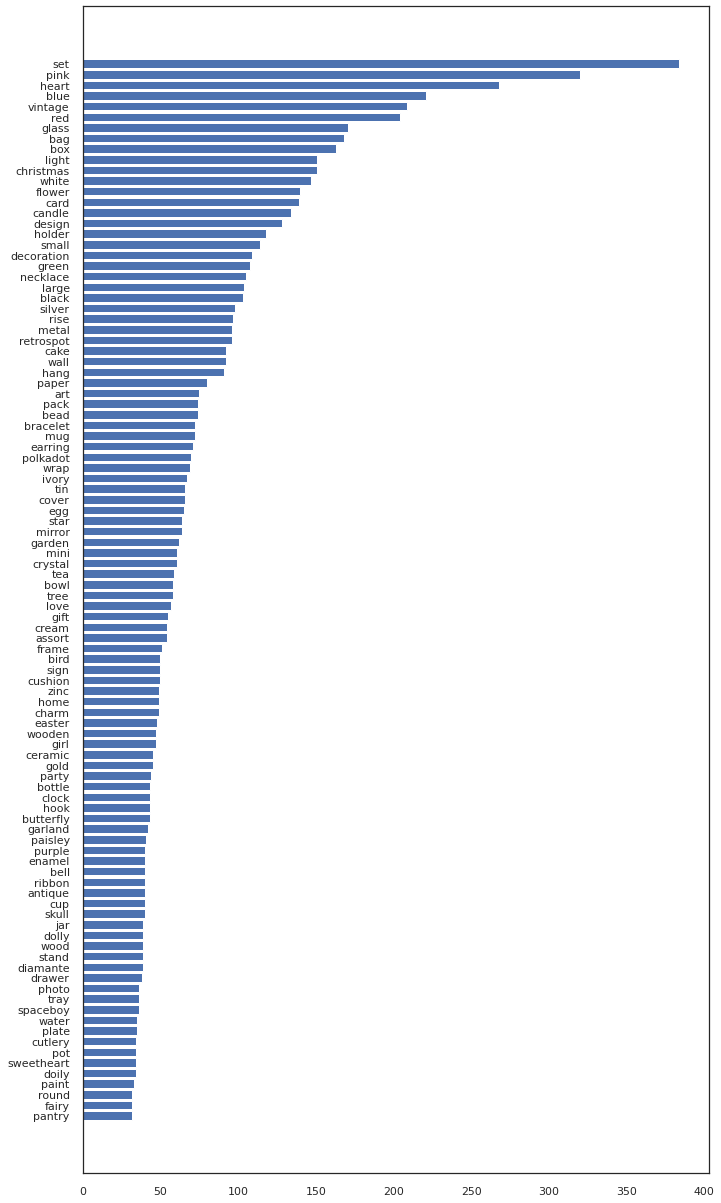

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist # function to find the frequent words in the data


# Extracts words into list and count frequency
all_words = ' '.join([text for text in df2['Description_NLP']])  # all the rows are joined into a single paragraph
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 100 words by frequency
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

# Plotting 100 frequent words
plt.figure(figsize=(10,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

### Word Cloud:

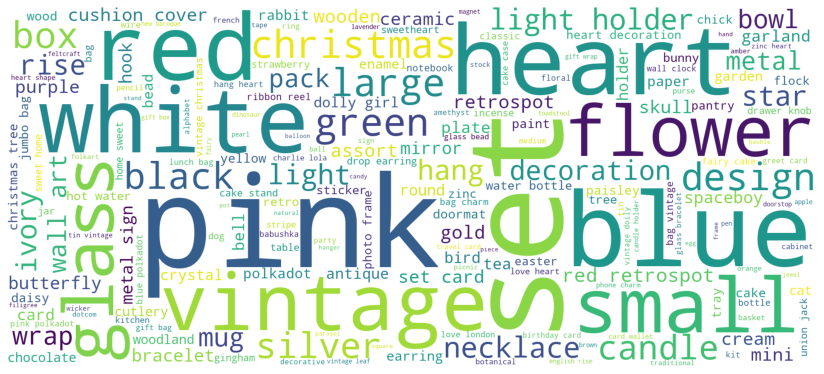

In [352]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df2['Description_NLP']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# VECTORIZATION - Bag of Words Model

### Binary approach:
* Since the "product description" contains "unique words", I use Binary approach.

In [353]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Design the Vocabulary
count_vectorizer = CountVectorizer(binary = True) 

# Step 2: Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2['Description_NLP']) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df_binary = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

In [354]:
df_binary

,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [355]:
# convert into numpy array:
x = bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Modelling:

In [356]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

### Elbow plot (K-MEANS):
*  We make a plot between k value and inertia

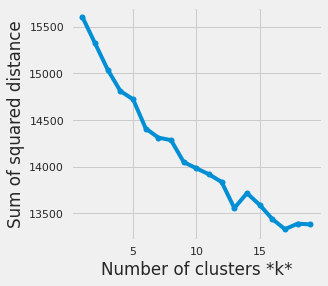

In [357]:
from sklearn.cluster import KMeans

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

***INTERPRETATION*** of the above Elbow plot:
  * Since, we didnot get the optimum k-value, we need to reduce the number of feature using Dimensionality Reduction.

# Dimensionality reduction:
* Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by ***transforming a large set of variables into a smaller one that still contains most of the information*** in the large set.
* HOW DO YOU DO A PCA?
  * Standardize the range of continuous initial variables
  * Compute the covariance matrix to identify correlations
  * Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
  * Create a feature vector to decide which principal components to keep
  * Recast the data along the principal components axes

###  PCA: 

In [358]:
from sklearn.decomposition import PCA

# finding the optimum number of components:
components = None
pca = PCA(n_components = components)  # components - hyperparameter
pca.fit(x)

PCA()

In [359]:
# printing the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[2.43000659e+00 1.93833945e+00 1.81119608e+00 ... 1.55014673e-33
 6.64538639e-34 5.60064570e-34]


In [360]:
# printing the cumulative variances
print("Cumulative Variances (Percentage):")
print((pca.explained_variance_ratio_.cumsum() * 100))

Cumulative Variances (Percentage):
[  2.43000659   4.36834604   6.17954211 ... 100.         100.
 100.        ]


Text(0, 0.5, 'Explained variance (%)')

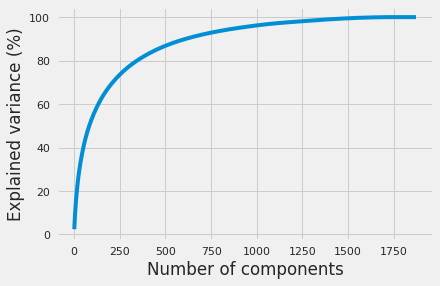

In [361]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

***INTERPRETATION*** of the above graph:


*   We can see that it takes 1250 components to reach around 100% variance.
*   But I consider 85% variance is sufficient for modelling



Number of components: 451


Text(0, 0.5, 'Explained variance (%)')

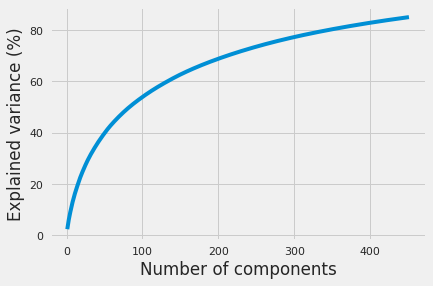

In [362]:
# choosing only 85% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)
pca.fit(x)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

***Interpretation*** of the above:
* We can see that ***optimal components is 450*** for the variation of 85%

### Applying PCA:

In [363]:
from sklearn.decomposition import PCA

pca = PCA(450)
PCA_data = pca.fit_transform(x)
PCA_data.shape 

(4021, 450)

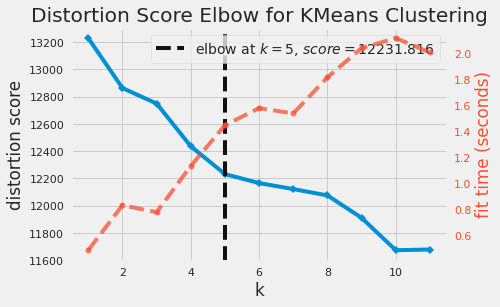

In [364]:
# Elbow plot
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(PCA_data)
visualizer.show()

***Interpretation*** of the Elbow plot:
* optimal k-value occurs at 4
* ie. 4 clusters are required

### k-means algorithm:

In [365]:
km = KMeans(n_clusters=4,init="k-means++",random_state=42)    # applying k = 4
km.fit(PCA_data)           # fit the data - identify pattern, does everything

centroids = km.cluster_centers_  # final centroid points
print("centroids: \n",centroids)

print("\ninertia: ",km.inertia_)  # measures how tight my groups are. Lower the better

centroids: 
 [[-2.10188354e-01  6.93244413e-02  8.57234894e-01 ... -9.95407239e-05
  -1.96147494e-05  5.37386019e-06]
 [-8.23211165e-02 -2.88905401e-02 -6.13820410e-02 ...  1.39670533e-05
   5.58209144e-05 -2.98888511e-05]
 [-2.68770252e-02 -4.09193767e-02 -3.04756478e-01 ...  1.34365125e-04
  -7.78671372e-04  1.67005956e-04]
 [ 8.96895283e-01  2.25271860e-01  6.31061721e-02 ... -1.13918192e-04
  -1.21441283e-04  1.84423510e-04]]

inertia:  12435.340468785704


In [366]:
km.labels_   # shows which group each datapoint belongs to

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [367]:
#predict the labels of clusters
label = km.fit_predict(PCA_data)  
print(label)

[0 1 0 ... 1 0 1]


### Visualizing the Product Clusters:

2D plotting:

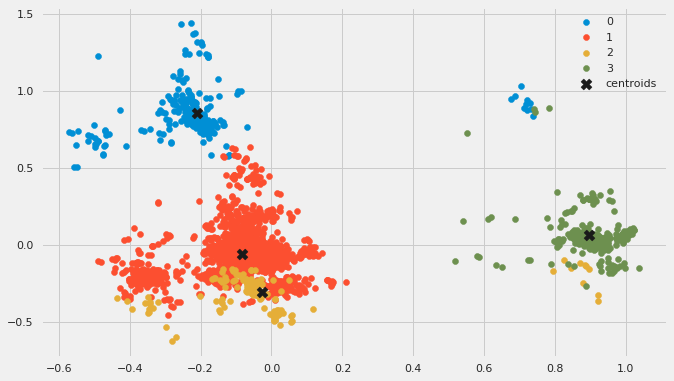

In [368]:
centroids = km.cluster_centers_   # Getting the Centroids
u_labels = np.unique(label)      # Getting the labels
 
# plotting the results:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(PCA_data[label == i , 0] , PCA_data[label == i , 2] , label = i)
plt.scatter(centroids[:,0] , centroids[:,2] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

3D plotting:

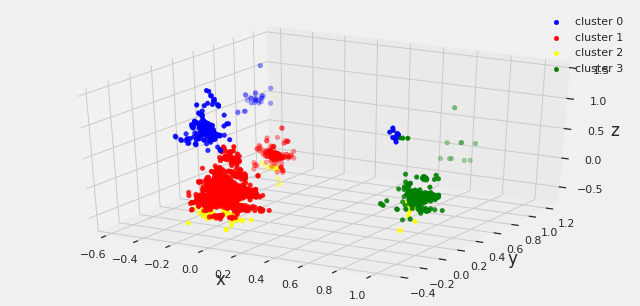

In [369]:
labels = np.unique(label)  # Getting the labels

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_data[label == 0,0],PCA_data[label == 0,1],PCA_data[label == 0,2], s = 20 , color = 'blue', label = "cluster 0")  
ax.scatter(PCA_data[label == 1,0],PCA_data[label == 1,1],PCA_data[label == 1,2], s = 20 , color = 'red', label = "cluster 1")  
ax.scatter(PCA_data[label == 2,0],PCA_data[label == 2,1],PCA_data[label == 2,2], s = 20 , color = 'yellow', label = "cluster 2")  
ax.scatter(PCA_data[label == 3,0],PCA_data[label == 3,1],PCA_data[label == 3,2], s = 20 , color = 'green', label = "cluster 3") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.show()

# Joining the Product_Clusters with Original_Dataframe:

In [370]:
# creating a dataframe for the cluster labels:
df5 = pd.DataFrame(km.labels_)
print(df5.shape)
df5

(4021, 1)


,0
0,0
1,1
2,0
3,1
4,0
...,...
4016,1
4017,1
4018,1
4019,0


In [371]:
# checking the shape of df2
print(df2.shape)
df2

(4021, 1)


,Description_NLP
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


Interpretation of the above 2 dataframes:
* shape of df5 & df2 is same, but the index are different.
* We need to make the index same in order to merge

In [372]:
df2 = df2.reset_index(drop=True) # resetting the index to get uniform index values

df6 = df2.join(df5)  # joining the "product clusters" with the "Description_NLP"

df6.rename(columns={0:'Product Cluster'},inplace=True) # renaming the column

In [373]:
# merging the "product clusters" with the original dataframe:
df8 = pd.merge(df, df6, how='left', on='Description_NLP')
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_NLP,Product Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,0
...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,1
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,1
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,1
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,1


# Data Preprocessing:

### OneHot encoding the "Product clusters":




In [374]:
df9 = pd.get_dummies(df8,columns=["Product Cluster"])
df9.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_NLP,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,1,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,0,1,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,1,0,0,0


In [375]:
# copying the dataframe into another variable:
df10 = df9.copy()

In [376]:
# Dropping unnecessary features:
df10 = df10.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Description_NLP"],axis=1)
df10.head(3)

,Quantity,UnitPrice,CustomerID,Country,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3
0,6,2.55,17850.0,United Kingdom,1,0,0,0
1,6,3.39,17850.0,United Kingdom,0,1,0,0
2,8,2.75,17850.0,United Kingdom,1,0,0,0


### OneHot encoding "Country" feature:

In [377]:
df11 = pd.get_dummies(df10,columns=["Country"])
df11.head(3)

,Quantity,UnitPrice,CustomerID,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,17850.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Label encoding "customerID":

In [378]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() # label_encoder object knows how to understand word labels.
 
df11['CustomerID']= label_encoder.fit_transform(df11['CustomerID'])
df11.head(3)

,Quantity,UnitPrice,CustomerID,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,4048,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,4048,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,4048,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [379]:
df11.shape

(540455, 45)

### Grouping the Customers based on CustomerID:


*   Taking the ***mean*** of the group





In [380]:
df12 = df11.groupby(['CustomerID']).mean()
df12

,Quantity,UnitPrice,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
1,13.505495,2.644011,0.054945,0.736264,0.131868,0.076923,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,75.516129,5.764839,0.064516,0.838710,0.000000,0.096774,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,8.643836,8.289041,0.136986,0.657534,0.013699,0.191781,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,11.588235,3.841176,0.000000,0.941176,0.058824,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,7.714286,5.622857,0.000000,0.571429,0.142857,0.285714,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4369,7.538462,4.821538,0.000000,0.923077,0.000000,0.076923,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4370,1.847884,1.614987,0.022487,0.441799,0.473545,0.062169,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000


In [381]:
# statistical EDA on the dataframe:
df12.describe()

,Quantity,UnitPrice,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,...,4373.000000,4373.000000,4373.000000,4373.00000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,22.384653,7.978650,0.085506,0.727179,0.077552,0.109764,0.001901,0.002119,0.000457,0.005462,...,0.000229,0.000229,0.000229,0.00678,0.001829,0.004669,0.000915,0.000457,0.903496,0.000915
std,213.233296,144.946736,0.109164,0.173809,0.141509,0.104748,0.042440,0.045446,0.021383,0.073012,...,0.015122,0.015122,0.015122,0.08158,0.042737,0.067689,0.030234,0.021383,0.295310,0.030234
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.461538,2.221642,0.000000,0.647059,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.494048,2.944593,0.053942,0.745098,0.023256,0.096154,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.000000,3.898836,0.124088,0.833333,0.094891,0.157068,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [382]:
# Converting into numpy array:
y = df12.to_numpy()

### Scaling: (MinMax scaler)
* It ranges from 0 to 1

In [383]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

# Modelling:

### Elbow plot

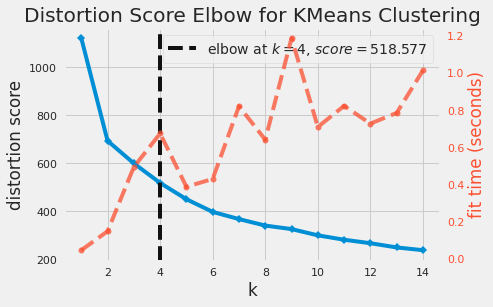

In [384]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=9)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(y_scaled)
visualizer.show()

***Interpretation***:
* The optimal value of k occurs at k=4

### k-means clustering:

In [385]:
km = KMeans(n_clusters=4, init= "k-means++", random_state=9)     # applying k = 4
km.fit(y_scaled)          # fit the data - identify pattern, does everything

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_)    # measures how tight my groups are. Lower the better

inertia:  518.5768263351381


In [386]:
km.labels_   # shows which group each datapoint belongs to

array([0, 1, 1, ..., 3, 0, 0], dtype=int32)

In [387]:
# predict the labels of clusters
label = km.fit_predict(y_scaled)  
print(label)

[0 1 1 ... 3 0 0]


### Visualizing the customer clusters:

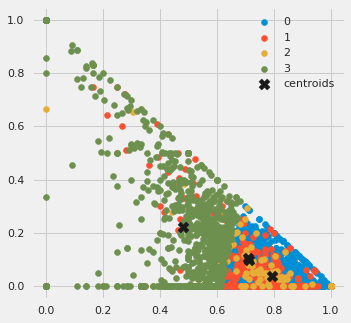

In [388]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

# 2D plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 3] , y_scaled[label == i , 4] , label = i)
plt.scatter(centroids[:,3] , centroids[:,4] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

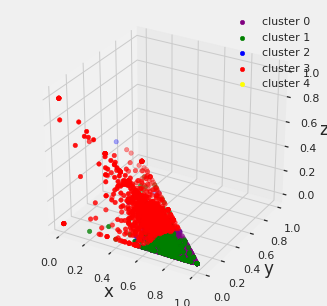

In [389]:
# 3D plotting
labels = np.unique(label)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_scaled[label == 0,3],y_scaled[label == 0,4],y_scaled[label == 0,2], s = 20 , color = 'purple', label = "cluster 0")  
ax.scatter(y_scaled[label == 1,3],y_scaled[label == 1,4],y_scaled[label == 1,2], s = 20 , color = 'green', label = "cluster 1")  
ax.scatter(y_scaled[label == 2,3],y_scaled[label == 2,4],y_scaled[label == 2,2], s = 20 , color = 'blue', label = "cluster 2")  
ax.scatter(y_scaled[label == 3,3],y_scaled[label == 3,4],y_scaled[label == 3,2], s = 20 , color = 'red', label = "cluster 3")  
ax.scatter(y_scaled[label == 4,3],y_scaled[label == 4,4],y_scaled[label == 4,2], s = 20 , color = 'yellow', label = "cluster 4")  

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

***INTERPRETATION*** of the above plot:
* since the datapoints are closer to each other, there is no clear cluster formed.

In [390]:
df13 = pd.DataFrame(label) # creating a dataframe for the "customer clusters"

df13.reset_index(level=0, inplace=True) # creating the "customerID" column

df13.rename(columns={'index':'CustomerID', 0:'Customer cluster'},inplace=True) # renaming the columns

df13.head()

,CustomerID,Customer cluster
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [391]:
# count of each clusters
df14 = df13.groupby("Customer cluster").count()
df14

,CustomerID
Customer cluster,
0,3104
1,327
2,95
3,847


# Plotting the Customer Clusters:

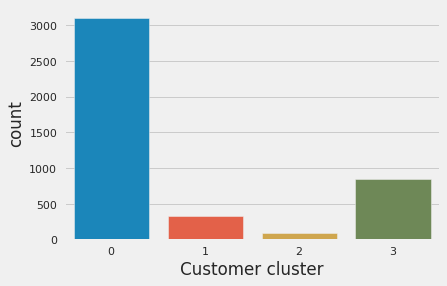

In [392]:
# check the number of clusters and number of CUSTOMERS in each cluster
import seaborn as sns
sns.countplot(df13["Customer cluster"])

***INTERPRETATION***:
* cluster-0 contains the maximum number of Customers, followed by cluster-3
* cluster-1,2 contains the least number of Customers.

# Silhouette score:

* If the score is 1, the cluster is dense and well-separated from other clusters. 
* A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.
* Look for a silhouette score closer to 1. This score varies from -1 to 1

In [393]:
from sklearn import metrics
score = metrics.silhouette_score(y_scaled, km.labels_ )
score

0.43339315843270204

***Interpretation*** of Silhouette score:
* score of 0.44 shows that the clusters are not well seprated from each other, and it overlaps each other slightly.
* overall, it is a good score


# INFERENCES:

* Thus we have grouped ***Similar Customers*** based on:
    * Products they bought
    * Quantity and Price of the purchase
    * Country of origin of the customers
* We have found that the customers can be ***segmented into 4 buckets***, based on their similarity.